In [1]:
from drift_agrawal import SubgroupDriftAgrawal
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from river.drift import binary as drift
from run import to_Xy

In [2]:
train_size = 10_000
batch_size = 5_000
test_batches=200

ds = SubgroupDriftAgrawal(sg_size=0.02,
                          perturbation=0.1,
                          position=train_size + (test_batches // 2) * batch_size,
                          width = (test_batches // 4) * batch_size)

In [3]:
clf = DecisionTreeClassifier(max_depth=3)
X_train, y_train = to_Xy(ds, train_size)
clf.fit(X_train, y_train)

acc = []
acc_sg = []

for batch in range(test_batches):
    X_test, y_test, is_sg, _ = to_Xy(ds, batch_size, drift_info=True)
    y_pred = clf.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    if sum(is_sg) > 0:
        acc_sg.append(accuracy_score(y_test[is_sg], y_pred[is_sg]))
    else:
        acc_sg.append(0)

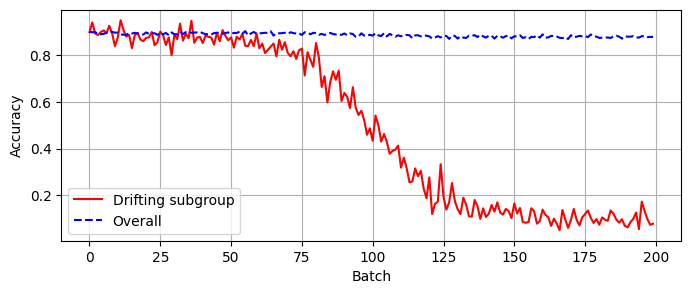

In [4]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(acc_sg, c='r', label="Drifting subgroup")
ax.plot(acc, c='b', label="Overall", ls='--')
ax.grid()
ax.set_xlabel("Batch")
ax.set_ylabel("Accuracy")
ax.legend()

fig.savefig("example.pdf", bbox_inches='tight')